딥러닝이 발전하면서 여러가지로 세분화 되었다.

Deep learning    
-> CNN : 이미지 처리에 특화 (Converusion Neural Network)    
Deep learing     
-> RNN : 자연어 처리 (Recursive Neural Network)    
(자연어는 - 앞에 있는 단어에 뒤에 있는 단어에 영향을 끼친다.)

이렇게 두가지 알고리즘이 대표적인데, 다양한 알고리즘이 탄생하였고 지금도 생겨나고 있다.

- - -
지금도 계속 알고리즘이 생겨나고 있다.
이미지 처리도 지금은 CNN보다 좋은 알고리즘으로 GNN 등이 나타나고 있다.
이미지 처리를 잘 하기 위해서는 꼭 OpenCV를 같이 공부/사용 해야한다.
OpenCv는 이미지 처리에 특화 된 라이브러리

- - -
이번엔 CNN을 사용해서 MNIST를 학습시켜보자.

지금까지 우리가 한 학습은 Fully connected 네트워크이다. (모든 노드들이 연결되어 있었다.)    
CNN 또한 뒤쪽에 FC 단계가 있다. 하지만 CNN의 중요한 특징은 FC 앞쪽에 있는 새로운 계층들이다.    

CNN의 앞 부분은,    
이미지 전체를 학습하는 것이 아니라 이미지를 잘게 쪼개서, 각 부분들을 학습한다.    
그 잘게 쪼개진 이미지들을 학습하는 과정에서 이미지의 여러 ___특징___들이 학습된다.    

잘게 쪼개진 이미지들의 용량이 커버리면 전체 용량이 너무 커져버린다.
때문에 크기를 줄여줘야 원할한 학습이 가능해진다.    

- - -
## CNN

### Filter
필터의 크기는 내가 마음대로 설정 할 수 있지만 Depth는 원본 이미지(3)와 같아야한다. -> 원본 이미지와 매칭해야 되기 때문    
Filter값을 정하고 Stride를 정하면 원본 이미지와 계산되어 몇개의 특징을 Node가 도출될지 계산된다.    

### Stride
Stride는 Image의 크기와 Filter값에 의해 가능한 숫자가 달라진다. (Default = 1) 
> ex>    
크기가 7 * 7 * 3 인 이미지가 있다. (depth가 3인 이유 : 이미지는 ( R, G, B ) 3개의 값이 1 pixel을 구성하기 때문)    
크기가 3 * 3 * 3 인 필터를 적용한다면, stride가 ~가 가능하다.    
Stride가 Default인 1이라고 가정하면, 
    (image)7 * 7 * 3 -(filter : 3 * 3 * 3)-> (image)5 * 5 * 3 가 된다.

이렇게 필터를 한단계 더 적용하게 되면 이미지 크기가 3 * 3 * 3이 되는데, 이는 크기가 너무 작아서 특징을 추출하기 어려워진다.
그래서 __Padding__이 등장했다.

### Padding



그리고 이러한 특징들이 적용된 필터들을 하나의 계층에서도 여러개 만들 수 있다는 것이다.    
그렇게 되면 점점 더 많은 필터들이 중첩되기 시작한다.
> ex>
첫 이미지    CONV, ReLU    Layer 1    
 32x32x3   --(5x5x3, 6)--> 28x28x6


이런식으로 진행되면 최종적으로,
이미지의 크기는 줄어들지만 훨씬 더 많은 특징들을 학습 하게 된다.

### multi filter
여러개의 필터를 적용함으로써, 한 layer에서도 여러개의 필터를 적용 할 수 있다.
덕분에 Depth 가 점점 더 깊어지게 된다.

### Pooling (Max pooling)
이건 특징을 추출할수록 이미지의 크기가 너무 커져서, 특징은 유지하며 이미지 크기를 줄이는 단계이다.
여기는 필터와 비슷한 개념인 커널을 사용한다.
커널이 필터와 같이 stride값에 따라, 이미지를 부분 부분으로 자르면서 가장 큰 값의 특징을 추출한다.
그 덕분에 커널의 크기와 Stride 값에 따라 이미지의 특징을 잘 유지하면서도 이미지의 크기를 줄인 이미지를 만들 수 있다.

Pooling은 이미지 크기를 조정 하고 싶을 때, 언제든 사용 할 수 있다.



In [12]:
import tensorflow as tf
import numpy as np

# 사용하는 이미지는 (이미지개수, 가로픽셀수, 세로픽셀수, color)
# (1, 3, 3, 1) -> 이미지 한개, 3x3크기, 1->gray scale

# image = np.array([[1],[2],[3]]) # 각각의 grayscale값을 한 행에 만들었다.

# image = np.array([[1],[2],[3]],
#                  [[4],[5],[6]],
#                  [[7],[8],[9]]) # 숫자들은 grayscale의 값을 의미(임의값대입함), 그리고 3x3행열로 이미지 구현

image = np.array([[[[1],[2],[3]],
                 [[4],[5],[6]],
                 [[7],[8],[9]]]], dtype=np.float64) # 이미지가 한개이기에 하나로 묶어준다. + 머신러닝은 실수형만 가능하다.
# print(image.shape)

# 필터에 대한 정보 (필터 가로픽셀, 필터 세로픽셀, color, 필터개수)
# (2, 2, 1, 1)

weight = np.array([[[[1]],[[1]]],
                  [[[1]],[[1]]]], dtype=np.float64) # 1차원의 값을 가지고, 2x2의 크기를 가지는 필터를 1개 만들었다.
# print(weight.shape)

# stride = 1
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding = "VALID")
# padding ="VALID"는 패딩이 없다는 뜻이다.
print(conv2d.shape) # -> (1, 2, 2, 1) 이 나온다.
# activation map에 1차원의 값을 갖고, 2x2의 크기로 1개의 필터가 있다는 것이다.



(1, 2, 2, 1)


이렇게 CNN이 어떻게 이루어지는지 기본적인 원리를 알아보았다.    
이제 MNIST를 CNN으로 학습시켜보자.

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
(1, 26, 26, 5)


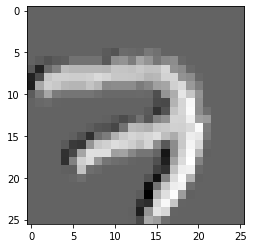

In [33]:
## MNIST 이미지를 이용해서 Convolution layer를 처리하자.
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

# plt.imshow(mnist.train.images[0].reshape(28,28), cmap = "Greys")   자료의 첫번째 이미지를 28x28로 변환해서 표현한다.
# plt.show()


## 사용하는 이미지는 (이미지개수, 가로픽셀수, 세로픽셀수, color)
img = mnist.train.images[0].reshape(1, 28, 28, 1) # -> 1차원 이미지를 Convolution을 수행 할 수 있는 4차원으로 바꾼 것.

## 필터에 대한 정보 (필터가로픽셀, 필터세로픽셀, color, 필터개수)
w = tf.Variable(tf.random_normal([3, 3, 1, 5]), name = "filter1")
conv2d = tf.nn.conv2d(img, w, strides=[1,1,1,1], padding="VALID") # strid가 가로1, 세로1이고, pading은 사용하지 않는다.
# print(conv2d.shape) # -> (1, 26, 26, 5)가 잘 나온다.

sess = tf.Session()
sess.run(tf.global_variables_initializer())
# sess.run(conv2d)

conv2d_img = sess.run(conv2d)
print(sess.run(conv2d).shape)  # => (1, 26, 26, 5) 6가지 색의 26x26짜리 이미지가 1개 있다.
# 이 이미지를 5개의 이미지, depth=1로 바꾸어 입력 할 수 있도록 변환한다.
conv2d_img = np.swapaxes(conv2d_img, 0, 3) # 출력된 자료를 입력 할 수 있도록 축을 바꾼다.

# plt.imshow(conv2d_img[0].reshape(26,26), cmap = "Greys")   #자료의 첫번째 필터의 이미지를 28x28로 변환해서 표현한다.
plt.imshow(conv2d_img[1].reshape(26,26), cmap = "Greys")   #자료의 두번째 필터의 이미지를 28x28로 변환해서 표현한다.
plt.show()

In [39]:
## MNIST with CNN
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph()

## data loading, training data set, test data set
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

## placeholder
X = tf.placeholder(shape=[None, 784], dtype=tf.float32) # 처음에는 단순히 784개의 데이터를 입력받는다.
Y = tf.placeholder(shape=[None, 10], dtype=tf.float32) # 10개의 결과값이 있다.

## convolution layer
# 기존의 input데이터를 이용해서 학습에 필요한 새로운 이미지를 만든다.
## 사용하는 이미지는 (이미지개수, 가로픽셀수, 세로픽셀수, color)
x_img = tf.reshape(X, [-1, 28, 28, 1]) # -1 : (행의 개수는) 너가 계산해  => 여기에서는 -1을 55000으로 계산 할 것이다.
# 28x28의 이미지 색은 1개
# 4차원이 아니면 Convolution 계산을 할 수 없다.
W1 = tf.Variable(tf.random_normal([3,3,1,32]), name="filter1") # 필터를 랜던값으로 만든다.
# 3x3의 이미지 크기, color-depth=1, 필터 32개

L1 = tf.nn.conv2d(x_img, W1, strides=[1,1,1,1], padding="VALID") # 레이어를 만드는데, 스트라이드는 1, 패딩은 없다.
# 이 결과로 L1에는 1개의 이미지로 32개의 이미지를 만들어낸다.
L1 = tf.nn.relu(L1) # 만들어진 이미지들에 RELU 알고리즘을 적용한다.

L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                   padding="VALID") # 2x2 필터크기로 맥스풀링 한다. strides=2, Polling: X이다.
print(L1.shape) # <- (?, 13, 13, 32)
# 들어오는 이미지가 몇장인지 모르기에 ?로 표현되는데, 여기에서는 55000이다.
# 이미지 크기는 13x13이고, 32 종류의 필터가 적용되어 있다. (각 이미지가 32종류가 있다.)

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
(?, 13, 13, 32)


이렇게 Convolution Layer가 완성되었다.    
하나의 이미지를 Convolution layer를 통해 다량의 이미지로 변환 추출하였고,    
이러한 층을 반복 한 후,    
최종 결과물로 얻은 이미지를 FC Layer에 입력으로 사용한다. (Fully Connected => 기존의 딥러닝)    
- - -
우리는 시간이 부족하기에, Convolution Layer를 위의 한개만 사용하고, 바로 FC Layer와 연결해보자.    

In [41]:
# 얻은 이미지를 FC Layer에 활용
L1 = tf.reshape(L1,[-1, 13*13*32]) # Convolution layer를 거치면서 이미지 수가 확 늘어났다.


# dense layer
## Weight & bias
W1 = tf.get_variable("weight1", shape = ([784,256]),
                initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name = "bias1")
_layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)
layer1 = tf.nn.dropout(_layer1, rate=0.3) # Drop out 실행

W2 = tf.get_variable("weight2", shape = ([256,512]),
                initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]), name = "bias2")
_layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)
layer2 = tf.nn.dropout(_layer2, rate=0.3)  # Drop out 실행

W3 = tf.get_variable("weight3", shape = ([512,10]),
                initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]), name = "bias3")


## Hypothesis
logit = tf.matmul(layer2, W3) + b3  # 마지막 layer은 Drop out을 실행하지 않았다.
H = tf.nn.relu(logit)


## cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=Y))


## train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)


## Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())


## 학습
train_epoch = 50 # 학습을 횟수
batch_size = 100 # 데이터를 나눠서 학습하는 것

for step in range(train_epoch) :    
    num_of_iter = int(mnist.train.num_examples/batch_size) # 여기에서는 550이다.
    cost_val=0
    
    for i in range(num_of_iter) :
        batch_x, batch_y = mnist.train.next_batch(batch_size) # mnist에서는 배치크기에 따라 데이터들을 자동으로 만들어주는 함수가 있다.
        
        tmp_train, cost_val = sess.run([train, cost],
                                      feed_dict = {X: batch_x, Y : batch_y})

    if step % 3 == 0:
        print("cost 값은 {}".format(cost_val))
        
## 정확도 측정
predict = tf.cast(H>0.5, dtype=tf.float32)
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("\nCNN\ncorrect rate : {}".format(sess.run(accuracy, feed_dict={X: batch_x, Y : batch_y})))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
cost 값은 0.3269276022911072
cost 값은 0.22774378955364227
cost 값은 0.1718302220106125
cost 값은 0.15598654747009277
cost 값은 0.13899478316307068
cost 값은 0.13315244019031525
cost 값은 0.12538127601146698
cost 값은 0.08300194889307022
cost 값은 0.10085374116897583
cost 값은 0.08333919197320938
cost 값은 0.07923911511898041
cost 값은 0.08413144946098328
cost 값은 0.08823198080062866
cost 값은 0.0917210504412651
cost 값은 0.08804626762866974
cost 값은 0.06992312520742416
cost 값은 0.0604717954993248

CNN
correct rate : 0.968999981880188
